In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_cost = pd.read_parquet("../../data/df_cost.parquet")

In [6]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   place    1117 non-null   object        
 1   product  1117 non-null   object        
 2   cost     1117 non-null   float64       
 3   date     1117 non-null   datetime64[us]
dtypes: datetime64[us](1), float64(1), object(2)
memory usage: 35.0+ KB


In [5]:
df_cost

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


In [7]:
cat_col = ["place", "product"]
num_col = ["cost"]
time_col = ["date"]

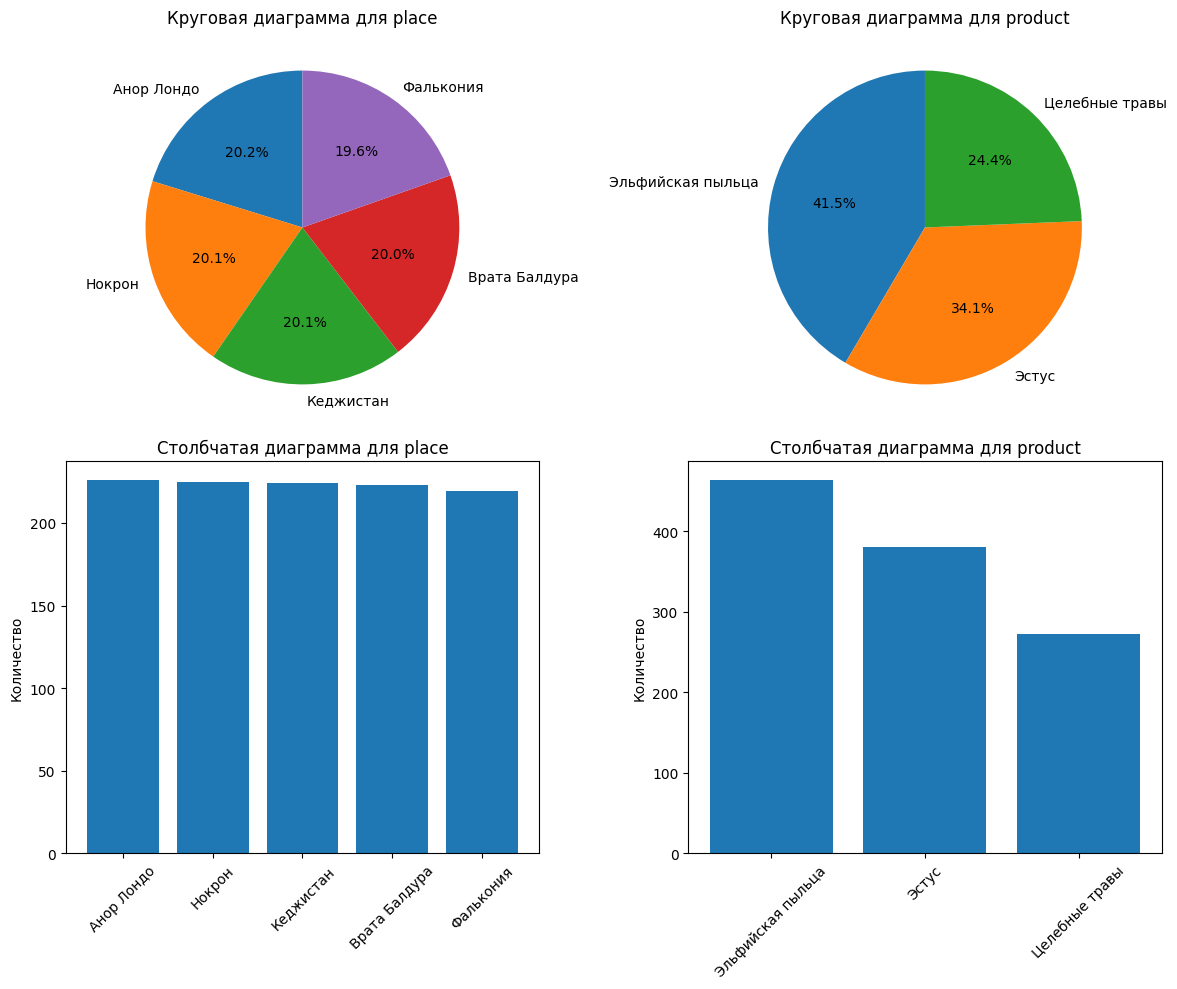

In [9]:
fig, axs = plt.subplots(2, len(cat_col), figsize=(6 * len(cat_col), 10))

for idx, col in enumerate(cat_col):
    value_counts = df_cost[col].value_counts()

    axs[0, idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axs[0, idx].set_title(f'Круговая диаграмма для {col}')

    axs[1, idx].bar(value_counts.index, value_counts.values)
    axs[1, idx].set_title(f'Столбчатая диаграмма для {col}')
    axs[1, idx].set_ylabel('Количество')

    if idx == 0 or idx == len(cat_col) - 1:
        axs[1, idx].set_xticks(range(len(value_counts.index)))
        axs[1, idx].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

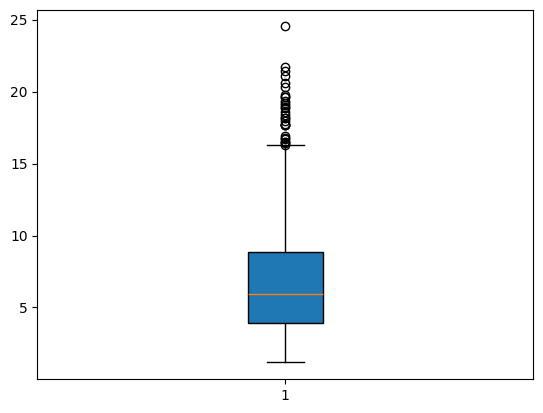

In [10]:
fig, ax = plt.subplots()
for col in num_col:
    plt.boxplot(df_cost[col], patch_artist=True)
    plt.show()

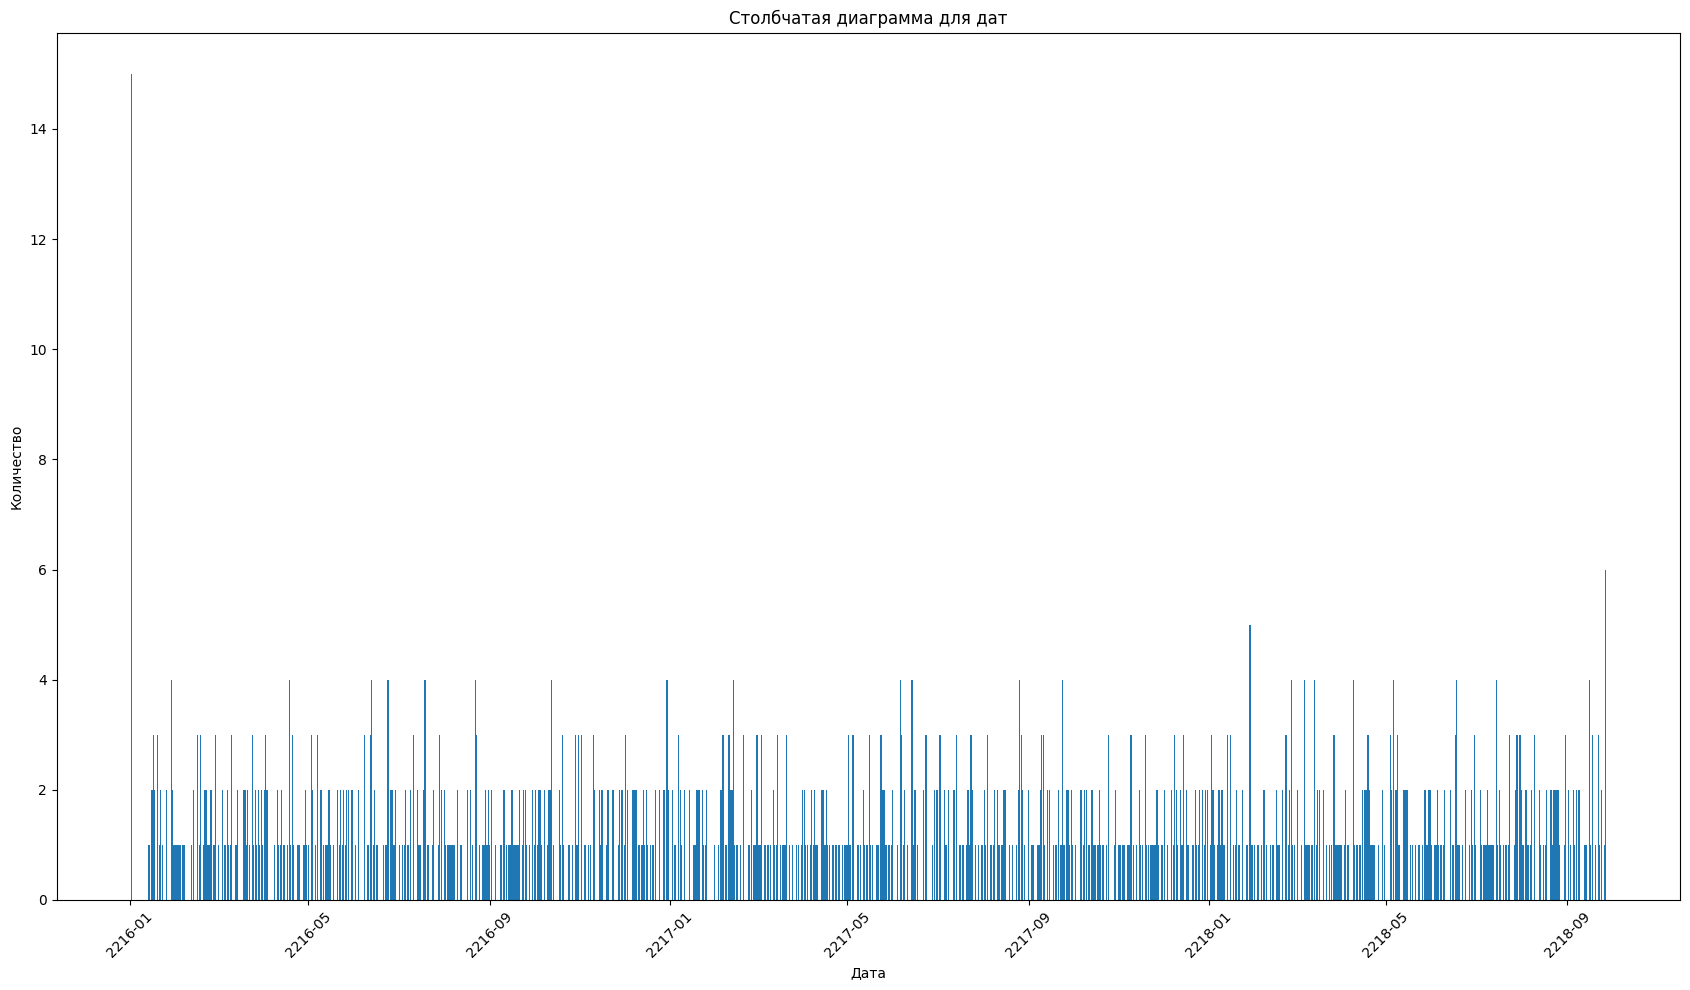

In [11]:
plt.figure(figsize=(17, 10))
value_counts = df_cost['date'].dt.normalize().value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.title(f'Столбчатая диаграмма для дат')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

норм!